In [105]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import os
import numpy as np

In [106]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
n_train = mnist.train.num_examples # 55,000
n_validation = mnist.validation.num_examples # 5000
n_test = mnist.test.num_examples # 10,000

n_input = 784   # input layer (28x28 pixels)
n_hidden1 = 500 # 1st hidden layer
n_hidden2 = 250 # 2nd hidden layer
n_hidden3 = 100 # 3rd hidden layer
n_output = 10   # output layer (0-9 digits)

op_folder = "./" + str(n_input) + "_" + str(n_hidden1) + "_" + str(n_hidden2) + "_" + str(n_hidden3) + "_" + str(n_output)

learning_rate = 1e-3
n_iterations = 1000
batch_size = 100

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [107]:
# Getting the input data and the ground truth in 1-hot notation
ip_data = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])

# Initializing the Weights matrices with a random normal distribution of S.D = 0.1
W = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'w4': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}

# Initializing the biases
b = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'b4': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

a1 = tf.add(tf.matmul(ip_data, W['w1']), b['b1'])
a2 = tf.add(tf.matmul(a1, W['w2']), b['b2'])
a3 = tf.add(tf.matmul(a2, W['w3']), b['b3'])
a4 = tf.matmul(a3, W['w4']) + b['b4']

# Cost function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=a4))
train_epoch = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

correct_pred = tf.equal(tf.argmax(a4, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

prediction = tf.argmax(a4, 1)
labels = tf.argmax(Y, 1)
conf_matrix = tf.math.confusion_matrix(labels, prediction)
precision = tf.metrics.precision(labels, prediction)
recall = tf.metrics.recall(labels, prediction)

In [108]:
# Training Phase

Loss, Accuracy, itr = [], [], []
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

# training in batches
for i in range(n_iterations):
    itr.append(i + 1)
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_epoch, feed_dict={ip_data: batch_x, Y: batch_y})
    # print loss and accuracy (per minibatch)
    minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={ip_data: batch_x, Y: batch_y})
    Loss.append(minibatch_loss)
    Accuracy.append(minibatch_accuracy)
    if(i % 100 == 0):
        print str(i + 1) + "Loss: " + str(minibatch_loss) + " Accuracy: " + str(minibatch_accuracy)

1Loss: 2.4203503 Accuracy: 0.37
101Loss: 0.4386732 Accuracy: 0.87
201Loss: 0.6948694 Accuracy: 0.82
301Loss: 0.33923194 Accuracy: 0.88
401Loss: 0.30582756 Accuracy: 0.93
501Loss: 0.39879298 Accuracy: 0.88
601Loss: 0.1864569 Accuracy: 0.95
701Loss: 0.41370982 Accuracy: 0.9
801Loss: 0.4715186 Accuracy: 0.93
901Loss: 0.3827845 Accuracy: 0.89


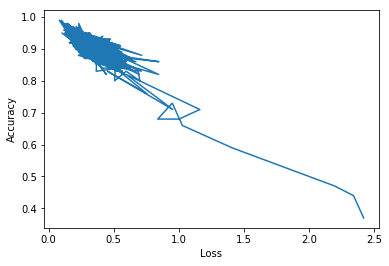

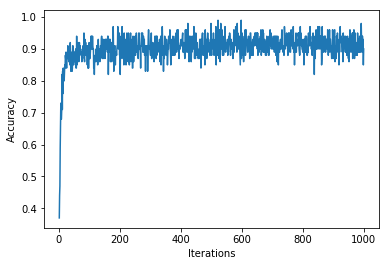

('Accuracy on testdata: ', 0.9158)
('Confusion Matrix: ', array([[ 944,    0,    4,    3,    1,   12,   10,    4,    1,    1],
       [   0, 1088,    7,    2,    1,    4,    3,    2,   28,    0],
       [   6,    4,  949,    6,    6,    5,    8,    9,   36,    3],
       [   1,    1,   33,  866,    1,   59,    2,   15,   22,   10],
       [   1,    3,   13,    1,  891,    1,   13,    3,   18,   38],
       [   7,    3,   10,   21,    7,  790,   11,   13,   25,    5],
       [  11,    2,   20,    1,    3,   15,  904,    1,    1,    0],
       [   1,    5,   17,    7,    7,    2,    0,  956,    3,   30],
       [  10,    3,   10,   22,    7,   36,    5,   15,  861,    5],
       [  11,    4,    1,   12,   24,    8,    0,   33,    7,  909]],
      dtype=int32))
('Precision: ', 0.99600357)
('Recall: ', 0.9946785)
('F Score: ', 0.9953405619333099)


In [109]:
plt.plot(Loss, Accuracy)
plt.xlabel("Loss")
plt.ylabel("Accuracy")

plt.savefig(op_folder + "/loss_accuracy.png", bbox_inches='tight')
plt.show()

plt.plot(itr, Accuracy)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.savefig(op_folder + "/iterations_accuracy.png", bbox_inches='tight')
plt.show()

# Testing Phase

[test_accuracy, conf_matr, precision, recall] = sess.run([accuracy, conf_matrix, precision, recall], feed_dict={ip_data: mnist.test.images, Y: mnist.test.labels})

print("Accuracy on testdata: ", test_accuracy)
print("Confusion Matrix: ", conf_matr)
print("Precision: ", precision[1])
print("Recall: ", recall[1])
print("F Score: ", (2 * precision[1] * recall[1] / (precision[1] + recall[1])))

if not os.path.exists(op_folder):
    os.makedirs(op_folder)

np.savetxt(op_folder + "/confusion_matrix.txt", conf_matr, fmt="%d")

with open(op_folder + "/accuracy_fscore.txt", 'w+') as the_file:
    the_file.write("Accuracy " + str(test_accuracy) + 
                  "\nF Score " + str((2 * precision[1] * recall[1] / (precision[1] + recall[1]))))

In [110]:
sess.close()